In [2]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles

df = pd.read_csv('data/state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Boxplots

Text(0, 0.5, 'Population (millions)')

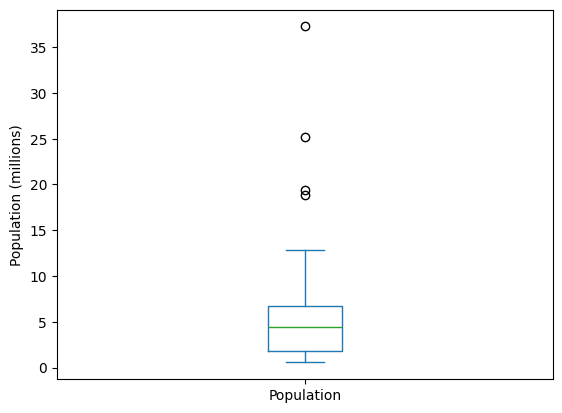

In [3]:
ax = (df['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

**Median**: the horizontal line in the box.  
The top and bottom of the box are the 75th and 25th **percentiles**, respectively.  
**Circles**: outliers  

### Frequency tables  
A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment.

#### Simple frequency table - showing frequency distribution

In [4]:
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

#### Formatted frequency table, elevated readability

In [5]:
# Cut Population into 10 bins
df["PopulationBin"] = pd.cut(df["Population"], bins=10)

# Group by bins: count states + list state names
population_freq = (
    df.groupby("PopulationBin")
      .agg(
          Number_of_States=("State", "count"),
          States=("State", lambda x: ", ".join(x))
      )
      .reset_index()
)

# Style the table for Jupyter with thousand separators
styled_table = (
    population_freq.style
    .format({
        "Number_of_States": "{:,}",  # add comma as thousand separator
        "PopulationBin": lambda x: f"{x.left:,.0f} – {x.right:,.0f}"
    })
    .set_table_styles(
        [
            {"selector": "th", "props": [("font-weight", "bold"), ("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "left")]}
        ]
    )
    .hide(axis="index")   # hide the pandas index
)

styled_table

/tmp/ipykernel_46250/948058491.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("PopulationBin")


PopulationBin,Number_of_States,States
"526,936 – 4,232,659",24,"Alaska, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Iowa, Kansas, Maine, Mississippi, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Oklahoma, Oregon, Rhode Island, South Dakota, Utah, Vermont, West Virginia, Wyoming"
"4,232,659 – 7,901,692",14,"Alabama, Arizona, Colorado, Indiana, Kentucky, Louisiana, Maryland, Massachusetts, Minnesota, Missouri, South Carolina, Tennessee, Washington, Wisconsin"
"7,901,692 – 11,570,725",6,"Georgia, Michigan, New Jersey, North Carolina, Ohio, Virginia"
"11,570,725 – 15,239,758",2,"Illinois, Pennsylvania"
"15,239,758 – 18,908,791",1,Florida
"18,908,791 – 22,577,824",1,New York
"22,577,824 – 26,246,857",1,Texas
"26,246,857 – 29,915,890",0,
"29,915,890 – 33,584,923",0,
"33,584,923 – 37,253,956",1,California


### Histogram

Text(0.5, 0, 'Population (millions)')

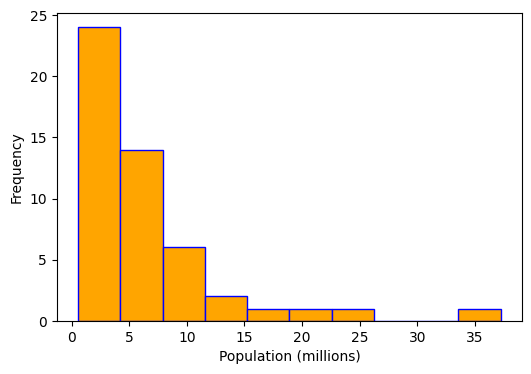

In [8]:
ax = (df['Population'] / 1_000_000).plot.hist(bins=10,figsize=(6, 4), color = 'orange', edgecolor = 'blue')
ax.set_xlabel('Population (millions)')

### Density plot - Sűrűségdiagram

Text(0.5, 0, 'Murder Rate (per 100,000)')

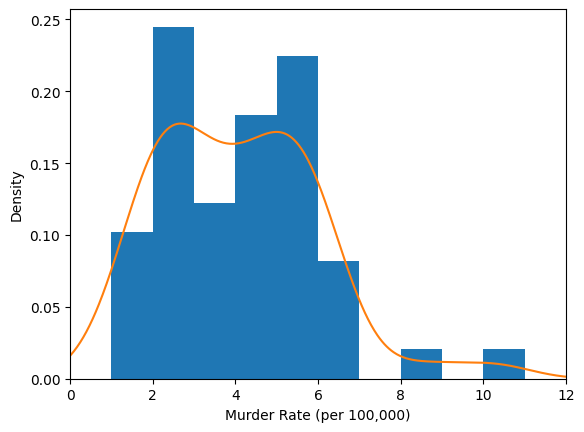

In [7]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')